経済学研究科：DONG MENG（董蒙） 学籍番号：EM215006

レポート１：
データセット：FIFA19
目標：選手の加齢は市場価値を押し下げるという仮説を検証する

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("data2.csv")

In [3]:
#　興味のあるデータを取り出す
df = data[['Wage', 'Wage2', 'Age', 'Overall', 'Potential', 'fifarank', 'Value', 'reputation', 'least_contract', 'Special', 'International Reputation','HeadingAccuracy']]
df

,Wage,Wage2,Age,Overall,Potential,fifarank,Value,reputation,least_contract,Special,International Reputation,HeadingAccuracy
0,€565K,565,31,94,94,11,€110.5M,5,3,2202,5.0,70.0
1,€405K,405,33,94,94,7,€77M,5,4,2228,5.0,89.0
2,€290K,290,26,92,93,3,€118.5M,5,4,2143,5.0,62.0
3,€260K,260,27,91,93,9,€72M,4,2,1471,4.0,21.0
4,€355K,355,27,91,92,1,€102M,4,5,2281,4.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17961,€1K,1,19,47,65,4,€60K,1,1,1307,1.0,40.0
17962,€1K,1,19,47,63,14,€60K,1,2,1098,1.0,52.0
17963,€1K,1,16,47,67,4,€60K,1,3,1189,1.0,46.0
17964,€1K,1,17,47,66,4,€60K,1,1,1228,1.0,39.0


In [4]:
# ValueとWageをfloat型に変換する
def parseValue(x):
    x = str(x).replace('€', '')
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

df['Value'] = df['Value'].apply(parseValue)
df['Wage'] = df['Wage'].apply(parseValue)
df['Wage']

<ipython-input-4-9214a5ece81b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = df['Value'].apply(parseValue)
<ipython-input-4-9214a5ece81b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wage'] = df['Wage'].apply(parseValue)


0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
17961      1000.0
17962      1000.0
17963      1000.0
17964      1000.0
17965      1000.0
Name: Wage, Length: 17966, dtype: float64

Text(0.5, 0, 'Age')

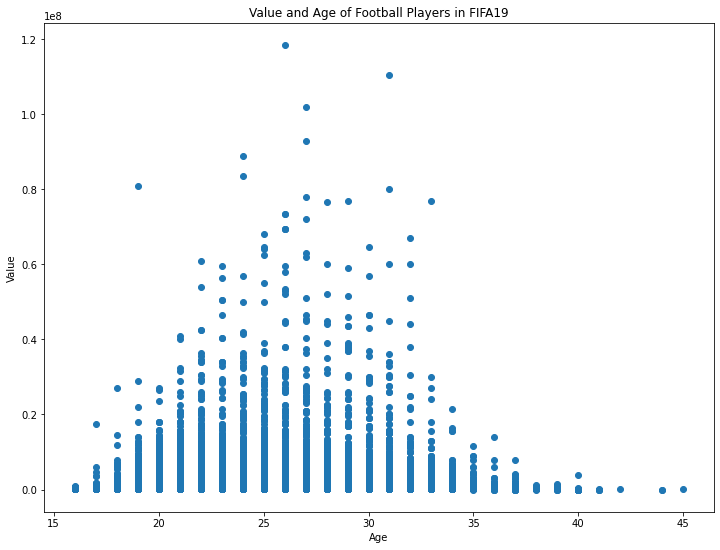

In [23]:
# ValueとAgeをプロットする
plt.figure(figsize=(12, 9))
plt.scatter(df['Age'], df['Value'])
plt.title('Value and Age of Football Players in FIFA19')
plt.ylabel('Value')
plt.xlabel('Age')

<AxesSubplot:>

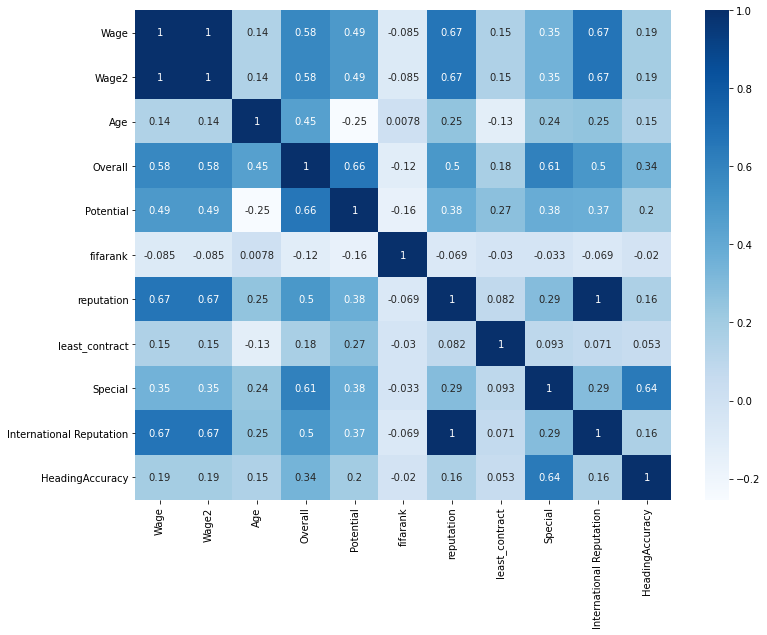

In [24]:
# 説明変数の相関係数を確認する
plt.figure(figsize=(12, 9))
sns.heatmap(df.drop('Value', axis = 1).corr(), annot=True, cmap='Blues')

In [26]:
# heatmapからInternational ReputationとReputation、Wage2とWageが高い相関関係を持っていることが分かる
# したがって、International ReputationとWage2を説明変数から取り除いて、残りを説明変数にする
df1 = df[['Wage', 'Age', 'Overall', 'Potential', 'fifarank', 'Value', 'reputation', 'least_contract', 'Special','HeadingAccuracy']]

# null値をdropする
df1 = df1.dropna()
df1.isnull().sum()

Wage               0
Age                0
Overall            0
Potential          0
fifarank           0
Value              0
reputation         0
least_contract     0
Special            0
HeadingAccuracy    0
dtype: int64

In [ ]:
Valueを被説明変数とし、多重回帰分析を行う

In [6]:
import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.linear_model import LinearRegression
y1 = df1['Value']
X1 = sm.add_constant(df1.drop('Value', axis=1))
model1 = sm.OLS(y1, X1)
result1 = model1.fit()
print(result1.summary())
print(result1.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     7824.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        16:50:53   Log-Likelihood:            -2.8964e+05
No. Observations:               17918   AIC:                         5.793e+05
Df Residuals:                   17908   BIC:                         5.794e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.432e+06   3.61e+05    -

回帰結果のp値からSpecialは統計的に有意ではないことが分かる。
Ageの係数からAgeはValueに負の影響を与えることが確認できる。

In [9]:
# 多重共線性問題あるかを確認する
from statsmodels.stats.outliers_influence import *
num_cols = model1.exog.shape[1] 
vifs = [variance_inflation_factor(model1.exog, i) for i in range(0, num_cols)]
pdv = pd.DataFrame(vifs, index=model1.exog_names, columns=["VIF"])
print(pdv)

                        VIF
const            363.653660
Wage               2.217928
Age                4.260206
Overall            8.285649
Potential          5.893059
fifarank           1.030029
reputation         1.974091
least_contract     1.095427
Special            2.457105
HeadingAccuracy    1.723087


VIFの結果から多重共線性問題がないのが確認できる。

In [10]:
# Specialを説明変数から取り除き、また多重回帰を行う。
df2 = df1.drop('Special', axis=1)
y2 = df2['Value']
X2 = sm.add_constant(df2.drop('Value', axis=1))
model2 = sm.OLS(y2, X2)
result2 = model2.fit()
print(result2.summary())
print(result2.pvalues)

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     8802.
Date:                Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                        16:52:52   Log-Likelihood:            -2.8964e+05
No. Observations:               17918   AIC:                         5.793e+05
Df Residuals:                   17909   BIC:                         5.794e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.391e+06    3.6e+05    -

Specialを取り除いた後、R-squaredは大きくなっていない

Text(0, 0.5, 'Predicted Value')

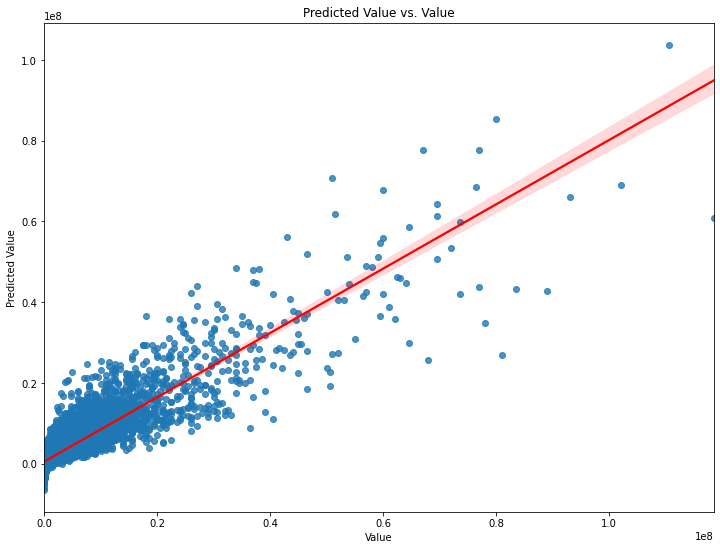

In [35]:
# model2によるValueの予測値と本当のValueの値をプロットする
y_pred = result2.predict(X2)
plt.figure(figsize=(12, 9))
sns.regplot(x=df2['Value'], y=y_pred, line_kws={'color': 'red'})
plt.title('Predicted Value vs. Value')
plt.xlabel('Value')
plt.ylabel('Predicted Value')

Text(0.5, 0, 'Predicted Values')

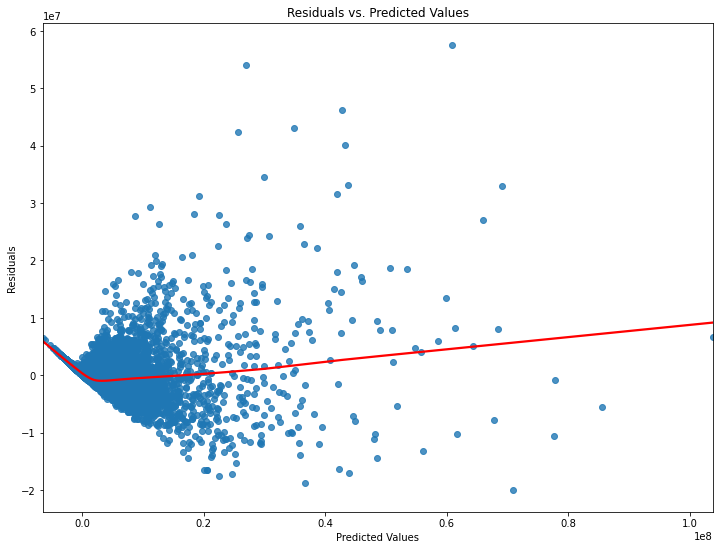

In [28]:
# OLS回帰分析の前提である残差の圴一分散を確認する
resid = result2.resid
plt.figure(figsize=(12, 9))
plt.title('Residuals vs. Predicted Values')
sns.regplot(x=y_pred, y=resid, lowess=True, line_kws={'color': 'red'})
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')

Valueの予測値は大体0.2より左にあるのが分かる。
Valueの予測値の増大に従って、residualsも大きくなる傾向にあるけれども、大体０の周辺に均等に分布していると思う。

参考になるもの：
https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0
https://www.kaggle.com/ketanp79/fifa-19-predicting-players-market-value